<a href="https://colab.research.google.com/github/Rogerio-mack/ABCXYZ/blob/main/Oriba_ABCXYZ_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<br>
<br>
<br>
<br>
<br>

# Prophet Forecast
---

# Important links

Homepage: https://facebookresearch.github.io/Kats/

Kats Python package: https://pypi.org/project/kats/

Facebook Engineering Blog Post: https://engineering.fb.com/2021/06/21/open-source/kats/

Source code repository: https://github.com/facebookresearch/kats

Contributing: https://github.com/facebookresearch/Kats/blob/master/CONTRIBUTING.md

Tutorials: https://github.com/facebookresearch/Kats/tree/master/tutorials


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
%%capture
!pip install kats

In [3]:
#@markdown `tspplot()`
def tspplot(ts=None,label=None,title=None,ax=None,linestyle='solid',alpha=1,lw=1,nr_xticks=None,nr_yticks=None):
  
  import matplotlib.ticker as ticker

  if ax is None:
    fig, ax = plt.subplots()
  
  if label is not None:
    ax.plot(ts, label=label, linestyle=linestyle, lw=lw)
  else:
    ax.plot(ts, linestyle=linestyle,lw=lw,alpha=alpha)

  if title is not None:
    ax.set_title(title)

  if nr_xticks is not None:
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nr_xticks))

  if nr_yticks is not None:
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nr_yticks))  
  
  if label is not None:
    plt.legend()

  plt.tight_layout()

  return



In [4]:
#@markdown `tspdisplay()`
class tspdisplay(object):
    # Adaptado de https://jakevdp.github.io/PythonDataScienceHandbook/index.html
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <hr>
    <h3 style='font-family:"Courier New", Courier, monospace'>{0}</h3><hr>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a + '.head()')._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a + '.head()'))
                           for a in self.args)

In [9]:
from kats.models.prophet import ProphetModel, ProphetParams
from kats.consts import TimeSeriesData, TimeSeriesIterator
from kats.detectors.cusum_detection import CUSUMDetector
  
def kats_prophet(df,steps_ahead=30,freq="MS",model='additive'):

  ts = TimeSeriesData(df)

  # import the param and model classes for Prophet model
  from kats.models.prophet import ProphetModel, ProphetParams

  # create a model param instance
  params = ProphetParams(seasonality_mode=model) # additive mode gives worse results

  # create a prophet model instance
  m = ProphetModel(ts, params)

  # fit model simply by calling m.fit()
  m.fit()

  # make prediction for next steps_ahead months
  pred = m.predict(steps=steps_ahead, freq=freq)

  return m, pred

# Aquisição dos Dados



In [5]:
df = pd.read_csv('https://github.com/Rogerio-mack/ABCXYZ/raw/main/oriba_base_reshaped.csv',index_col=0)
df.index = pd.to_datetime(df.index)
df.head()

,Bermuda Cargo Algodão Orgânico Light Azul Marinho,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,Bermuda Cargo Algodão Orgânico Light Preto,Bermuda Cargo Algodão Orgânico Light Verde Oliva,Bermuda Chambray Azul,Bermuda Chambray Preta,Bermuda Chambray Vermelha,Bermuda Chino Algodão Orgânico Relax Azul Marinho,Bermuda Chino Algodão Orgânico Relax Azul Médio,Bermuda Chino Algodão Orgânico Relax Off White,...,Suéter Gola V Azul Marinho,Suéter Gola V Cinza,Suéter Gola V Preta,Track Jacket OldSchool ORIBA+PACE Azul Marinho,Track Jacket OldSchool ORIBA+PACE Preto,Track Pants OldSchool ORIBA+PACE Azul Marinho,Track Pants OldSchool ORIBA+PACE Preto,Tricot Crewneck Patch ORIBA+PACE Preto,Tricot Listrado Navy/Off White,Tricot Listrado Off White/Navy
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df[ df.columns[0:50] ].isnull().sum() 

Bermuda Cargo Algodão Orgânico Light Azul Marinho      46
Bermuda Cargo Algodão Orgânico Light Cinza Chumbo      46
Bermuda Cargo Algodão Orgânico Light Preto             46
Bermuda Cargo Algodão Orgânico Light Verde Oliva       46
Bermuda Chambray Azul                                  26
Bermuda Chambray Preta                                 25
Bermuda Chambray Vermelha                              26
Bermuda Chino Algodão Orgânico Relax Azul Marinho      45
Bermuda Chino Algodão Orgânico Relax Azul Médio        45
Bermuda Chino Algodão Orgânico Relax Off White         45
Bermuda Chino Algodão Orgânico Relax Preto             45
Bermuda Chino Algodão Orgânico Relax Verde Oliva       45
Bermuda Chino Azul Marinho                              0
Bermuda Chino Bege                                      0
Bermuda Chino Cáqui                                    10
Bermuda Chino Cinza                                     0
Bermuda Chino Preta                                     0
Bermuda Chino 

In [7]:
def apply_kats_all(df, show_plot=False):
  forecast_months = 3
  mse_values = {}
  predictions = {}

  for c in df:

    print('Processing... ', c)
    max_date = df.index.max() - pd.DateOffset(months=forecast_months)
    df_kats = df[ df.index <= max_date][c].reset_index()
    df_kats.columns = ['time','sell']
    df_kats = df_kats.dropna()

    if len(df_kats) > 2*forecast_months:
      m, pred = kats_prophet(df_kats,model='additive',steps_ahead=forecast_months)
      pred = pred.set_index('time')

      pred.index = pred.index + pd.offsets.MonthEnd(0) # ajusta para o final do mês

      mse = np.mean( ( df[ df.index > max_date][c].values - pred['fcst'].values )**2 )
    else:
      print('*** WARNING *** product ', c , ' do not have data enough to forecast')
      mse = -1
      pred = pd.DataFrame()

    mse_values[c] = mse
    predictions[c] = pred

    if show_plot and mse != -1:
  
      fig, ax = plt.subplots()
      tspplot(df[c],ax=ax) 
      tspplot(pred['fcst'],title='Previsão',linestyle='dashed',ax=ax) 
      ax.fill_between(pred.index, pred['fcst_lower'], pred['fcst_upper'], color='grey', alpha=.3)

      # tspdisplay('df[[ df.columns[0] ]].tail()')
      # tspdisplay('pred')
      plt.show()

  return predictions, mse_values
    



Processing...  Bermuda Cargo Algodão Orgânico Light Azul Marinho
*** WARNING *** product  Bermuda Cargo Algodão Orgânico Light Azul Marinho  do not have data enough to forecast
Processing...  Bermuda Cargo Algodão Orgânico Light Cinza Chumbo
*** WARNING *** product  Bermuda Cargo Algodão Orgânico Light Cinza Chumbo  do not have data enough to forecast
Processing...  Bermuda Cargo Algodão Orgânico Light Preto
*** WARNING *** product  Bermuda Cargo Algodão Orgânico Light Preto  do not have data enough to forecast
Processing...  Bermuda Cargo Algodão Orgânico Light Verde Oliva
*** WARNING *** product  Bermuda Cargo Algodão Orgânico Light Verde Oliva  do not have data enough to forecast
Processing...  Bermuda Chambray Azul


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


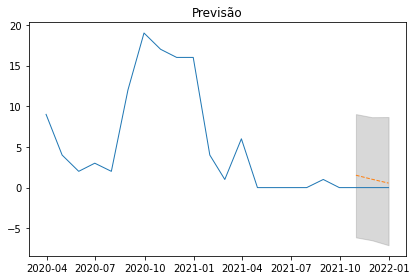

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


Processing...  Bermuda Chambray Preta


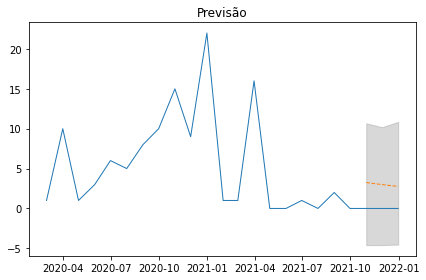

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.


Processing...  Bermuda Chambray Vermelha


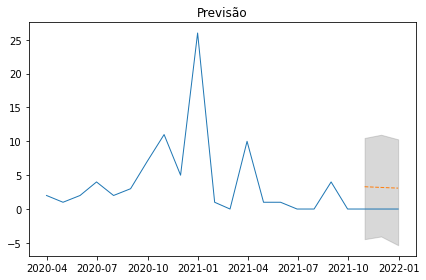

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Processing...  Bermuda Chino Algodão Orgânico Relax Azul Marinho
*** WARNING *** product  Bermuda Chino Algodão Orgânico Relax Azul Marinho  do not have data enough to forecast
Processing...  Bermuda Chino Algodão Orgânico Relax Azul Médio
*** WARNING *** product  Bermuda Chino Algodão Orgânico Relax Azul Médio  do not have data enough to forecast
Processing...  Bermuda Chino Algodão Orgânico Relax Off White
*** WARNING *** product  Bermuda Chino Algodão Orgânico Relax Off White  do not have data enough to forecast
Processing...  Bermuda Chino Algodão Orgânico Relax Preto
*** WARNING *** product  Bermuda Chino Algodão Orgânico Relax Preto  do not have data enough to forecast
Processing...  Bermuda Chino Algodão Orgânico Relax Verde Oliva
*** WARNING *** product  Bermuda Chino Algodão Orgânico Relax Verde Oliva  do not have data enough to forecast
Processing...  Bermuda Chino Azul Marinho


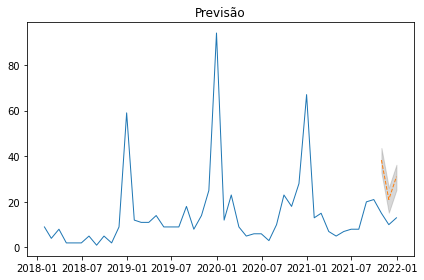

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Processing...  Bermuda Chino Bege


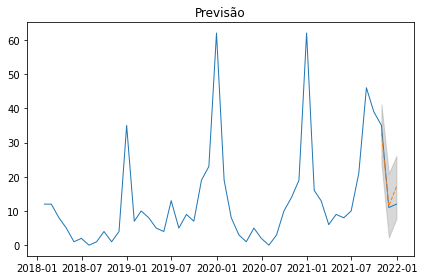

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Processing...  Bermuda Chino Cáqui


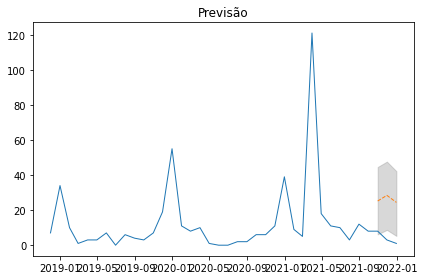

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Processing...  Bermuda Chino Cinza


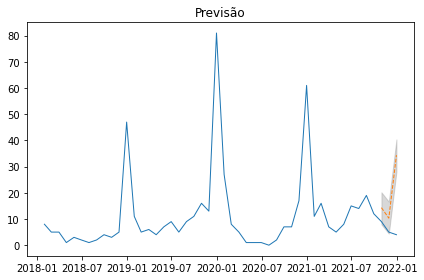

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Processing...  Bermuda Chino Preta


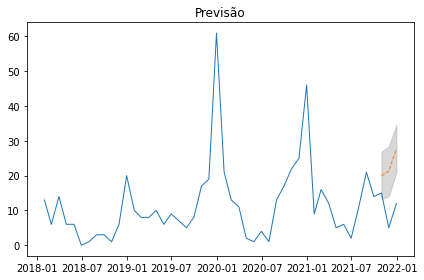

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Processing...  Bermuda Chino Verde Oliva


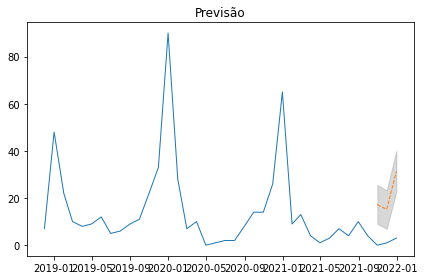

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Processing...  Bermuda Linho Azul Marinho


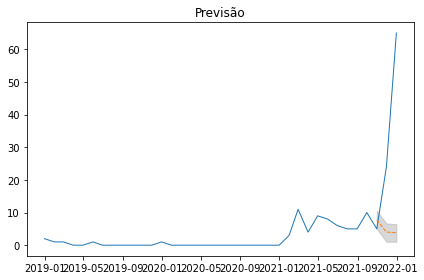

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


Processing...  Bermuda Linho Natural


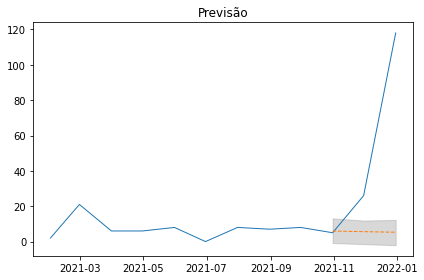

In [10]:
predictions, mse_values = apply_kats_all(df[ df.columns[0:20] ],show_plot=True)

In [11]:
column = 'Bermuda Chambray Azul'
pred = predictions[column]

pred.index = pred.index + pd.offsets.MonthEnd(0) 
pred

,fcst,fcst_lower,fcst_upper
time,,,
2021-10-31,1.523152,-6.114693,9.033230
2021-11-30,1.030319,-6.470143,8.655569
2021-12-31,0.553384,-7.076641,8.675008


,fcst,fcst_lower,fcst_upper
time,,,
2021-10-31,1.523152,-6.114693,9.033230
2021-11-30,1.030319,-6.470143,8.655569
2021-12-31,0.553384,-7.076641,8.675008


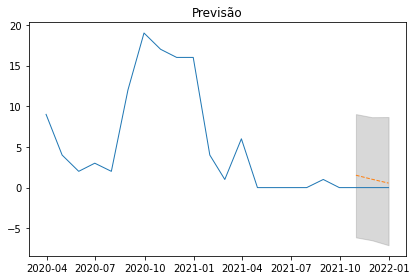

In [12]:
column = 'Bermuda Chambray Azul'
pred = predictions[column]

fig, ax = plt.subplots()
tspplot(df[[column]],ax=ax) 
tspplot(pred['fcst'],title='Previsão',linestyle='dashed',ax=ax) 
ax.fill_between(pred.index, pred['fcst_lower'], pred['fcst_upper'], color='grey', alpha=.3)

# tspdisplay('df[[ df.columns[0] ]].tail()')
tspdisplay('pred')

In [13]:
produto = []
mse_forecast = []
for key, value in mse_values.items():
  produto.append(key)
  mse_forecast.append(value)

mse_df = pd.DataFrame()
mse_df['produto'] = produto
mse_df['mse_forecast'] = mse_forecast

mse_df = mse_df.sort_values('mse_forecast').reset_index(drop=True)

display(mse_df)

,produto,mse_forecast
0,Bermuda Cargo Algodão Orgânico Light Azul Marinho,-1.000000
1,Bermuda Chino Algodão Orgânico Relax Verde Oliva,-1.000000
2,Bermuda Chino Algodão Orgânico Relax Preto,-1.000000
3,Bermuda Chino Algodão Orgânico Relax Azul Médio,-1.000000
4,Bermuda Chino Algodão Orgânico Relax Azul Marinho,-1.000000
5,Bermuda Chino Algodão Orgânico Relax Off White,-1.000000
6,Bermuda Cargo Algodão Orgânico Light Verde Oliva,-1.000000
7,Bermuda Cargo Algodão Orgânico Light Preto,-1.000000
8,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,-1.000000
9,Bermuda Chambray Azul,1.229261


# Download tables

In [14]:
mse_df.to_csv('mse_df.csv',index=None)


In [15]:
from google.colab import files

files.download('mse_df.csv')
